Capstone Project

1. use government employeement data to predict the job openings in a year

dataset: Job opening time series JOLTS at national and 4 regions

         current employees at state/area level monthly TS
         
         Business Dynamics report empolyeement openings time series at different industry statewide
         

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import os
from datetime import datetime
from matplotlib import pyplot as plt
path=os.getcwd()
path

'E:\\Ailin\\TDI\\capstone'

In [2]:
path = 'E:\\Ailin\\TDI\\capstone\\Govenment_data\\BD_Business Employment Dynamic\\'
filename = path + 'bd.data.1.AllItems.txt'
BD = pd.read_csv(filename,header = 0,sep = '\t',quotechar = '"')

C:\Users\Swen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
BD.head()

,series_id,year,period,value,footnote_codes
0,BDS0000000000000000110001LQ5,1992,Q03,7369,1
1,BDS0000000000000000110001LQ5,1992,Q04,6940,1
2,BDS0000000000000000110001LQ5,1993,Q01,7280,1
3,BDS0000000000000000110001LQ5,1993,Q02,7215,1
4,BDS0000000000000000110001LQ5,1993,Q03,7585,1


In [3]:
BD['seasonal'] = BD.series_id.str[2]
BD['msa_code'] = BD.series_id.str[3:8]
BD['state_code'] = BD.series_id.str[8:10]
BD['county_code'] = BD.series_id.str[10:13]
BD['industry_code'] = BD.series_id.str[13:19]
BD['unitanalysis_code'] = BD.series_id.str[19]
BD['dataelement_code'] = BD.series_id.str[20]
BD['sizeclass_code'] = BD.series_id.str[21:23]
BD['dataclass_code'] = BD.series_id.str[23:25]
BD['ratelevel_code'] = BD.series_id.str[25]
BD['periodicity_code'] = BD.series_id.str[26]
BD['ownership_code'] = BD.series_id.str[27]

BD.head()

,series_id,year,period,value,footnote_codes,seasonal,msa_code,state_code,county_code,industry_code,unitanalysis_code,dataelement_code,sizeclass_code,dataclass_code,ratelevel_code,periodicity_code,ownership_code
0,BDS0000000000000000110001LQ5,1992,Q03,7369,1,S,00000,00,000,000000,1,1,00,01,L,Q,5
1,BDS0000000000000000110001LQ5,1992,Q04,6940,1,S,00000,00,000,000000,1,1,00,01,L,Q,5
2,BDS0000000000000000110001LQ5,1993,Q01,7280,1,S,00000,00,000,000000,1,1,00,01,L,Q,5
3,BDS0000000000000000110001LQ5,1993,Q02,7215,1,S,00000,00,000,000000,1,1,00,01,L,Q,5
4,BDS0000000000000000110001LQ5,1993,Q03,7585,1,S,00000,00,000,000000,1,1,00,01,L,Q,5


In [11]:
BD.shape

(3599376, 17)

In [18]:
US = BD[BD.state_code =='00']
# only one msa code national level
# state alabama has 58360 lines
# national has more data 644536 lines
# county code is 000 for all

In [23]:
Manuf = US[US.industry_code =='100030']
# total private at national level has 85552 lines
# manufacturing at national level has only 8920 lines

In [25]:
Manuf_employ = Manuf[Manuf.dataelement_code == '1']
Manuf_estab = Manuf[Manuf.dataelement_code == '2']

In [36]:
Manuf_employ_open = Manuf_employ[Manuf_employ.dataclass_code == '03']
Manuf_employ_openL =  Manuf_employ_open[Manuf_employ_open.ratelevel_code == 'L']
Manuf_employ_openL_U = Manuf_employ_openL[Manuf_employ_openL.seasonal == 'U']
Manuf_employ_openL_U.shape
# for each individual industry category, 
# info only at all size level, no further details
# dataclass = '03' for openings,only 606 rows left
# among 606 rows, half is level data, half is rate data
# among 303 rows, 103 is seasonal adjusted, from 1992 to 2018, each quarter one input
# 200 is  not seasonal adjust

(200, 17)

In [47]:
Manuf_employ_openL_U.groupby('periodicity_code').size()

periodicity_code
A     97
Q    103
dtype: int64

In [4]:
Manuf_employ_open_level = BD[BD.series_id == 'BDS0000000000100030110003LQ5  ']
All_employ_open_level = BD[BD.series_id == 'BDS0000000000000000110003LQ5  ']

In [83]:
All_employ_open_level.shape

(103, 17)

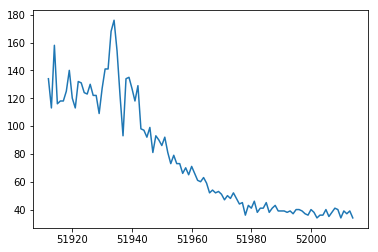

In [63]:
Manuf_employ_open_level.value.apply(int).plot(kind='line')

In [5]:
dti = pd.date_range('1992-09-30', periods=103, freq='Q')


In [6]:
df = pd.Series(Manuf_employ_open_level.value.apply(int).values, index=dti)

In [7]:
df_all = pd.Series(All_employ_open_level.value.apply(int).values, index=dti)

In [159]:
#df = pd.DataFrame(dti, columns=['date'])
#df['value'] = Manuf_employ_open_level.value.apply(int).values
#df_all = pd.DataFrame(dti, columns=['date'])
#df_all['value'] = All_employ_open_level.value.apply(int).values


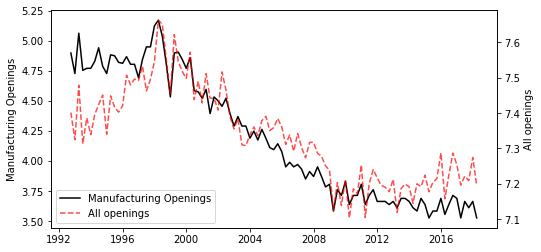

In [8]:
fig, ax1 = plt.subplots(figsize=[8, 4])

ln1 = ax1.plot(np.log(df), 'k', label='Manufacturing Openings')
ax1.set_ylabel('Manufacturing Openings')
ax1.grid(False)

ax2 = ax1.twinx()
ln2 = ax2.plot(np.log(df_all), 'r--', alpha=.7, label='All openings')
ax2.set_ylabel('All openings')
ax2.grid(False)

lines = ln1 + ln2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc=3)

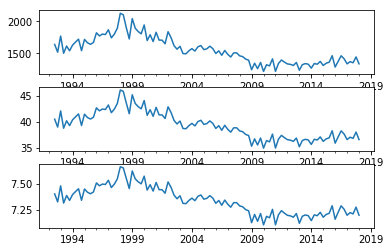

In [9]:
import numpy as np
#np.log(df).plot()
fig, axes = plt.subplots(3, 1)
df_all.plot(kind='line', ax=axes[0])
np.sqrt(df_all).plot(kind='line',  ax=axes[1])
np.log(df_all).plot(kind='line',  ax=axes[2])

In [10]:
def add_constant(X):
    X['const'] = pd.Series(np.ones(len(X.index)),index=X.index)
    return X

In [11]:
df= df.to_frame(name='Value')
df['Julian'] = df.index.to_julian_date()
df = add_constant(df) 
df.head()

,Value,Julian,const
1992-09-30,134,2448895.5,1.0
1992-12-31,113,2448987.5,1.0
1993-03-31,158,2449077.5,1.0
1993-06-30,116,2449168.5,1.0
1993-09-30,118,2449260.5,1.0


In [12]:
import sklearn.linear_model
import sklearn.metrics
# train a exponential model
exponential_model = sklearn.linear_model.Ridge().fit(
  X=df[['Julian','const']], y=np.log(df['Value']))


exp_model_df = df
exp_model_df['Exponential_Model'] = np.exp(exponential_model.predict(df[['Julian', 'const']]))
exp_model_df['Log_Error_Exponential'] = np.log(df['Value'] / df['Exponential_Model'])

In [166]:
sqrt_model = sklearn.linear_model.Ridge().fit(
  X=df[['Julian','const']], y=np.sqrt(df['Value']))


sqrt_model_df = df
sqrt_model_df['sqrt_Model'] = (sqrt_model.predict(df[['Julian', 'const']]))**2
sqrt_model_df['sqrt_Error_square'] = np.sqrt(df['Value'] / df['sqrt_Model'])

In [167]:
cbrt_model = sklearn.linear_model.Ridge().fit(
  X=df[['Julian','const']], y=np.cbrt(df['Value']))


cbrt_model_df = df
cbrt_model_df['cbrt_Model'] = (cbrt_model.predict(df[['Julian', 'const']]))**3
cbrt_model_df['cbrt_Error_cubic'] = np.cbrt(df['Value'] / df['cbrt_Model'])

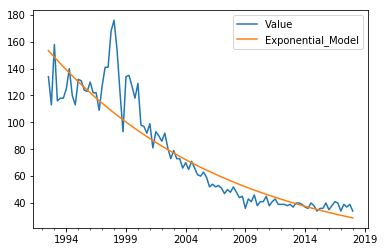

In [13]:
exp_model_df[['Value', 'Exponential_Model']].plot();
#sqrt_model_df[['Value', 'sqrt_Model']].plot();
#cbrt_model_df[['Value', 'cbrt_Model']].plot();

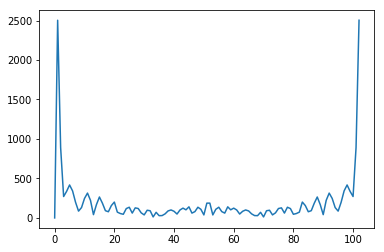

In [14]:
from scipy import fftpack
fft = fftpack.fft(df.Value-df.Value.mean())
plt.plot(np.abs(fft))

In [195]:
# did not see much of the periodical effect here
#np.abs(fft)

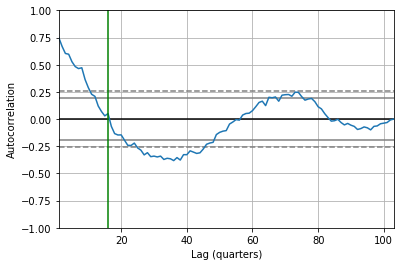

In [15]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Log_Error_Exponential'])
plt.xlabel('Lag (quarters)')
plt.axvline(16, color = 'green');

From above figures, the characteristic time scale is 16 quarters, which is about 4 years. so if we want to predict future openings, we should only consider noise up 4 years prior.

In [16]:
## Create a column with "true" (future) values
PERIOD_Quarter = 1  #  openings are updated quarterly
PREDICTION_LAG = 4 * PERIOD_Quarter

CUT_YEAR = 2008

# Notice that the goal (what we want to predict) is the openings shifted by the desired period of time.
df['Actual'] = df['Value'].shift(-PREDICTION_LAG)

In [190]:
#df.head(10)

In [18]:
### Cross validation -- simple model

# Reporting function
def summarize_errors(test_me):
    error_pct = (test_me['Actual'] - test_me['Model']) / test_me['Actual']

    print(error_pct.describe())
    error_pct.plot()
    plt.title('% error')
    plt.show()

    error_pct.hist(bins=20, density=True, label = 'Counts')
    x = np.arange(-1, 1, 0.001)
    plt.plot(x, sp.stats.norm(loc=error_pct.mean(),
                              scale=error_pct.std()).pdf(x),
                              linewidth=3, color='red', label='Normal Dist')
    plt.title('Histogram of % errors')
    plt.legend()
    plt.show()

    print(sklearn.metrics.mean_squared_error(test_me['Actual'], test_me['Model']))

# Train the regression
def frame_to_feats(frame):
    feats = pd.DataFrame()
    
    feats['LEE'] = frame['Log_Error_Exponential']
    feats['LEE_1'] = frame['Log_Error_Exponential'].shift(1)
    feats['dLEE_avg'] = pd.Series.rolling(frame['Value'].diff(), window=4*PERIOD_Quarter).mean()
    feats['vol_avg'] = pd.Series.ewm(frame['Value'], span=4*PERIOD_Quarter).var(bias=False)
    
    feats['Actual_LEE'] = frame['Log_Error_Exponential'].shift(-PREDICTION_LAG)
    return add_constant(feats)



In [20]:
train = df[df.index.year < CUT_YEAR]
test = df[df.index.year >= CUT_YEAR]
frame_to_feats(train), train

(                 LEE     LEE_1  dLEE_avg      vol_avg  Actual_LEE  const
 1992-09-30 -0.135611       NaN       NaN          NaN   -0.197332    1.0
 1992-12-31 -0.289570 -0.135611       NaN   220.500000   -0.180838    1.0
 1993-03-31  0.061772 -0.289570       NaN   645.244898   -0.107075    1.0
 1993-06-30 -0.230919  0.061772       NaN   524.574130    0.022568    1.0
 1993-09-30 -0.197332 -0.230919     -4.00   324.509675   -0.115090    1.0
 1993-12-31 -0.180838 -0.197332      1.25   196.482095   -0.158700    1.0
 1994-03-31 -0.107075 -0.180838     -8.25   117.909005    0.012848    1.0
 1994-06-30  0.022568 -0.107075      6.00   163.630936    0.021558    1.0
 1994-09-30 -0.115090  0.022568      0.50   128.783302   -0.016865    1.0
 1994-12-31 -0.158700 -0.115090     -1.25   130.349326   -0.008469    1.0
 1995-03-31  0.012848 -0.158700      1.75   118.824594    0.063195    1.0
 1995-06-30  0.021558  0.012848     -2.25    81.751182    0.015996    1.0
 1995-09-30 -0.016865  0.021558      1

In [ ]:
#Train/Test
train = df[df.index.year < CUT_YEAR]
test = df[df.index.year >= CUT_YEAR]

feats = frame_to_feats(train).dropna(how='any')
X_train = feats.drop('Actual_LEE', axis=1).values
y_train = feats['Actual_LEE'].values
regress = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

# Predict
feats = frame_to_feats(test).dropna(how='any')
X_test = feats.drop('Actual_LEE', axis=1).values
y_test = feats['Actual_LEE'].values
feats['Predicted_LEE'] = regress.predict(X_test)

test = feats.join(test, rsuffix='_r').dropna(how='any')
test['Simple_Model'] = np.exp(test['Predicted_LEE']) * test['Exponential_Model']

# Report
test_me = test[['Actual', 'Simple_Model']].dropna(how='any') \
                                          .rename(columns={'Simple_Model': 'Model'})
summarize_errors(test_me)

for all private companies

In [198]:
df_all= df_all.to_frame(name='Value')
df_all['Julian'] = df_all.index.to_julian_date()
df_all = add_constant(df_all) 

In [200]:
exponential_model = sklearn.linear_model.Ridge().fit(
  X=df_all[['Julian','const']], y=np.log(df_all['Value']))


exp_model_df_all = df_all
exp_model_df_all['Exponential_Model'] = np.exp(exponential_model.predict(df_all[['Julian', 'const']]))
exp_model_df_all['Log_Error_Exponential'] = np.log(df_all['Value'] / df_all['Exponential_Model'])

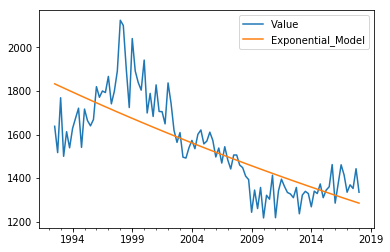

In [201]:
exp_model_df_all[['Value', 'Exponential_Model']].plot();

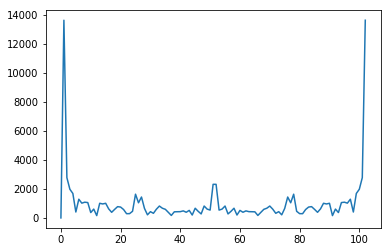

In [204]:
fft = fftpack.fft(df_all.Value-df_all.Value.mean())
plt.plot(np.abs(fft))

Again, there is no significant periodicity in the job opening at all private industries

In [205]:
df_all['Actual'] = df_all['Value'].shift(-PREDICTION_LAG)
#Train/Test
train = df_all[df_all.index.year < CUT_YEAR]
test = df_all[df_all.index.year >= CUT_YEAR]

count    33.000000
mean     -0.028762
std       0.045404
min      -0.120490
25%      -0.050464
50%      -0.027938
75%       0.002059
max       0.065290
dtype: float64


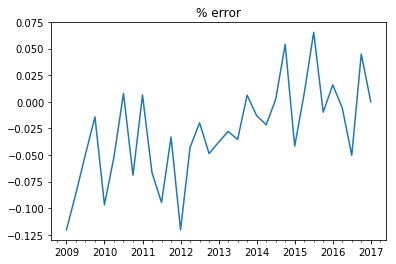

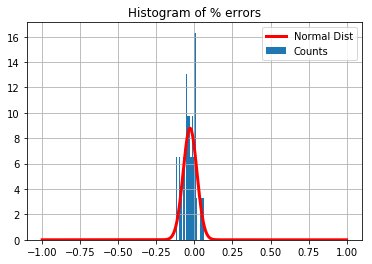

4769.342904852856


In [206]:
feats = frame_to_feats(train).dropna(how='any')
X_train = feats.drop('Actual_LEE', axis=1).values
y_train = feats['Actual_LEE'].values
regress = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

# Predict
feats = frame_to_feats(test).dropna(how='any')
X_test = feats.drop('Actual_LEE', axis=1).values
y_test = feats['Actual_LEE'].values
feats['Predicted_LEE'] = regress.predict(X_test)

test = feats.join(test, rsuffix='_r').dropna(how='any')
test['Simple_Model'] = np.exp(test['Predicted_LEE']) * test['Exponential_Model']

# Report
test_me = test[['Actual', 'Simple_Model']].dropna(how='any') \
                                          .rename(columns={'Simple_Model': 'Model'})
summarize_errors(test_me)

In [223]:
test_me

,Actual,Model
2009-03-31,1217.0,1363.605498
2009-06-30,1321.0,1434.769476
2009-09-30,1303.0,1367.496040
2009-12-31,1413.0,1433.086860
2010-03-31,1218.0,1335.994676
2010-06-30,1341.0,1410.498094
2010-09-30,1395.0,1384.178091
2010-12-31,1362.0,1456.015413
2011-03-31,1334.0,1325.669565
2011-06-30,1327.0,1415.699227


In [222]:
feats1 = frame_to_feats(test)
X_test1 = feats1.drop('Actual_LEE', axis=1).values
feats1['Predicted_LEE'] = regress.predict(X_test1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [220]:
df

,Value,Julian,const,Exponential_Model,Log_Error_Exponential,sqrt_Model,sqrt_Error_square,cbrt_Model,cbrt_Error_cubic,Actual
1992-09-30,134,2448895.5,1.0,153.461736,-0.135611,143.210562,0.967308,145.920916,0.971991,118.0
1992-12-31,113,2448987.5,1.0,150.951420,-0.289570,141.546284,0.893491,144.038231,0.922289,118.0
1993-03-31,158,2449077.5,1.0,148.535415,0.061772,139.927599,1.062617,142.212211,1.035715,125.0
1993-06-30,116,2449168.5,1.0,146.131878,-0.230919,138.300392,0.915835,140.381660,0.938388,140.0
1993-09-30,118,2449260.5,1.0,143.741463,-0.197332,136.664979,0.929207,138.547030,0.947898,120.0
1993-12-31,118,2449352.5,1.0,141.390150,-0.180838,135.039292,0.934783,136.728454,0.952082,113.0
1994-03-31,125,2449442.5,1.0,139.127175,-0.107075,133.458359,0.967792,134.964879,0.974757,132.0
1994-06-30,140,2449533.5,1.0,136.875878,0.022568,131.869324,1.030367,133.197194,1.016743,131.0
1994-09-30,120,2449625.5,1.0,134.636872,-0.115090,130.272501,0.959764,131.425843,0.970138,124.0
1994-12-31,113,2449717.5,1.0,132.434492,-0.158700,128.685406,0.937075,129.670266,0.955167,123.0


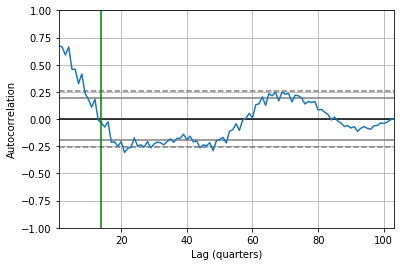

In [208]:
autocorrelation_plot(df_all['Log_Error_Exponential'])
plt.xlabel('Lag (quarters)')
plt.axvline(14, color = 'green');

the characteristic time scale for job openings for all private companies is 14 quarters, that is 3.5 years

In [212]:
Manuf_MI_open_level = BD[BD.series_id == 'BDS0000026000100030110003LQ5  ']
Manuf_MI_open_level.shape

(103, 17)

In [213]:
df_MI = pd.Series(Manuf_MI_open_level.value.apply(int).values, index=dti)

In [216]:
df.head(2)

,Value,Julian,const,Exponential_Model,Log_Error_Exponential,sqrt_Model,sqrt_Error_square,cbrt_Model,cbrt_Error_cubic,Actual
1992-09-30,134,2448895.5,1.0,153.461736,-0.135611,143.210562,0.967308,145.920916,0.971991,118.0
1992-12-31,113,2448987.5,1.0,150.951420,-0.289570,141.546284,0.893491,144.038231,0.922289,118.0


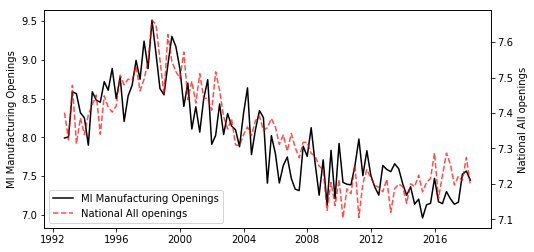

In [218]:
fig, ax1 = plt.subplots(figsize=[8, 4])

ln1 = ax1.plot(np.log(df_MI), 'k', label='MI Manufacturing Openings')
ax1.set_ylabel('MI Manufacturing Openings')
ax1.grid(False)

ax2 = ax1.twinx()
ln2 = ax2.plot(np.log(df_all.Value), 'r--', alpha=.7, label='National All openings')
ax2.set_ylabel('National All openings')
ax2.grid(False)

lines = ln1 + ln2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc=3)